In [1]:
import re
import matplotlib.pyplot as plt

# 로그 데이터 추출 함수
def extract_log_data(file_path):
    with open(file_path, "r") as f:
        log_data = f.read()

    # 정규 표현식 패턴 정의
    pattern1 = r"Epoch:\s*(\d+)"
    pattern2 = r"Train loss:([\d\.]+).*?train acc:\s*([\d\.]+)\s*test loss:([\d\.]+)\s*test acc:\s*([\d\.]+)"

    # 데이터를 추출
    data1 = re.findall(pattern1, log_data)
    data2 = re.findall(pattern2, log_data)

    # 에폭별 데이터 저장
    epochs = [int(epoch) for epoch in data1]
    train_loss = [float(loss) for loss, _, _, _ in data2]
    train_acc = [float(acc) for _, acc, _, _ in data2]
    test_loss = [float(loss) for _, _, loss, _ in data2]
    test_acc = [float(acc) for _, _, _, acc in data2]

    return epochs, train_loss, train_acc, test_loss, test_acc

In [12]:
log_files = [
    "1_noDP_log.txt",
    "1_DP_log.txt",
    "4_DPFK_log_tun2-2.txt",
    "4_DPFK_log_tun2-3.txt",
    "4_DPFK_log_tun2-1.txt",
    "4_DPFK_log_tun2-4.txt",
    "4_DPFK_log_tun2-5.txt",
    "4_DPFK_log_tun2-6.txt",
]  # 파일 경로를 입력하세요.

In [3]:
# 각 파일의 라벨 (원하는 이름으로 수정)
labels = [
    "noDP",
    "DP",
    "DP w/ KF (k=0.5)",
    "DP w/ KF (k=0.6)",
    "DP w/ KF (k=0.7)",
    "DP w/ KF (k=0.8)",
    "DP w/ KF (k=0.9)",
    "DP w/ KF (k=0.99)",
]

In [4]:
# 사용할 색상 (각 파일마다 다르게 설정)
colors = ["r", "m", "b", "g", "c", "y", "k", "orange", "purple", "brown"]

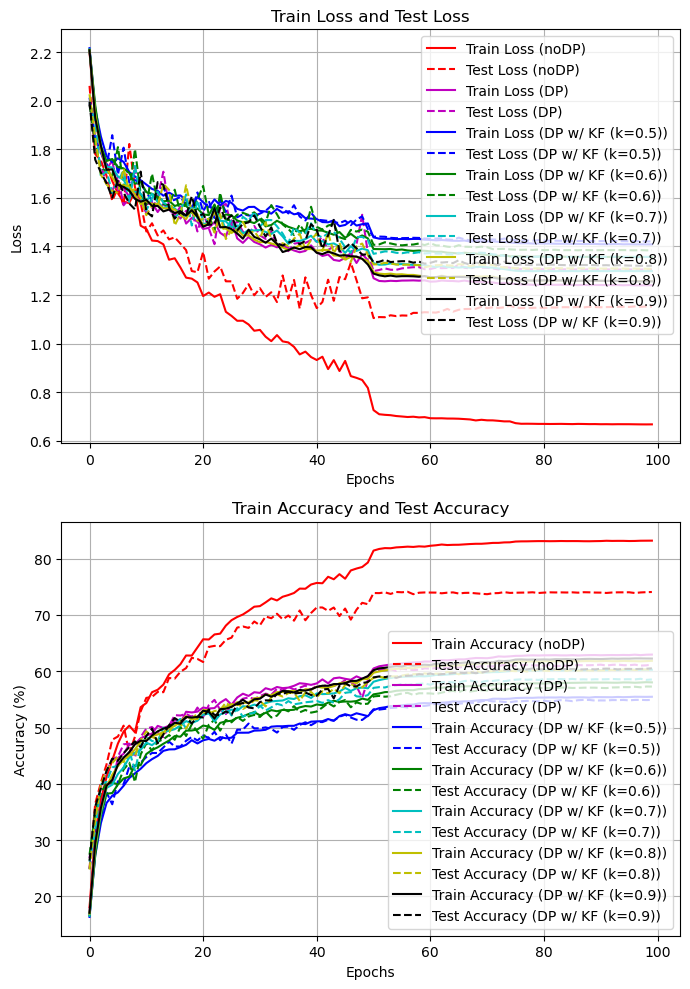

In [13]:
# 그래프 그리기
plt.figure(figsize=(7, 10))

# (1) Train Loss vs Test Loss
plt.subplot(2, 1, 1)
for idx, file in enumerate(log_files):
    epochs, train_loss, _, test_loss, _ = extract_log_data(file)
    # print("epochs", epochs)
    # print("train_loss", train_loss)
    plt.plot(epochs, train_loss, label=f"Train Loss ({labels[idx]})", color=colors[idx])
    plt.plot(
        epochs,
        test_loss,
        label=f"Test Loss ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train Loss and Test Loss")
plt.legend()
plt.grid(True)

# (2) Train Accuracy vs Test Accuracy
plt.subplot(2, 1, 2)
for idx, file in enumerate(log_files):
    epochs, _, train_acc, _, test_acc = extract_log_data(file)
    plt.plot(
        epochs, train_acc, label=f"Train Accuracy ({labels[idx]})", color=colors[idx]
    )
    plt.plot(
        epochs,
        test_acc,
        label=f"Test Accuracy ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train Accuracy and Test Accuracy")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

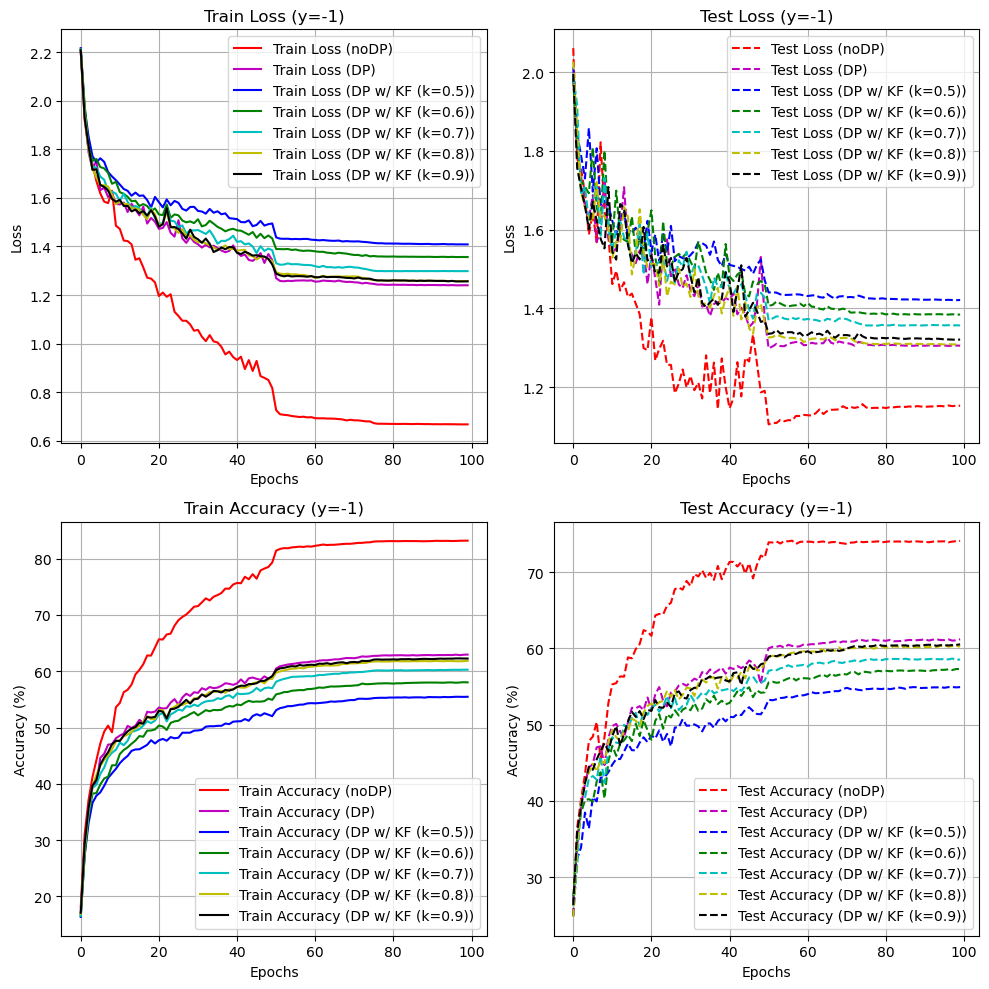

In [14]:
# 그래프 그리기
plt.figure(figsize=(10, 10))

# (1) Train Loss vs Test Loss
plt.subplot(2, 2, 1)
for idx, file in enumerate(log_files):
    epochs, train_loss, _, _, _ = extract_log_data(file)
    # print("epochs", epochs)
    # print("train_loss", train_loss)
    plt.plot(epochs, train_loss, label=f"Train Loss ({labels[idx]})", color=colors[idx])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train Loss (y=-1)")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for idx, file in enumerate(log_files):
    epochs, _, _, test_loss, _ = extract_log_data(file)
    # print("epochs", epochs)
    # print("train_loss", train_loss)
    plt.plot(
        epochs,
        test_loss,
        label=f"Test Loss ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Test Loss (y=-1)")
plt.legend()
plt.grid(True)


# (2) Train Accuracy vs Test Accuracy
plt.subplot(2, 2, 3)
for idx, file in enumerate(log_files):
    epochs, _, train_acc, _, _ = extract_log_data(file)
    plt.plot(
        epochs, train_acc, label=f"Train Accuracy ({labels[idx]})", color=colors[idx]
    )
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train Accuracy (y=-1)")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
for idx, file in enumerate(log_files):
    epochs, _, _, _, test_acc = extract_log_data(file)
    plt.plot(
        epochs,
        test_acc,
        label=f"Test Accuracy ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy (y=-1)")
plt.legend()
plt.grid(True)


# 그래프 출력
plt.tight_layout()
plt.show()

In [16]:
log_files = [
    "first_DP_log.txt",
    "third_DPKF_log_tun1.txt",
    "third_DPFK_log_tun2_xcomb.txt",
    "second_DPKF_log_gt-rev.txt",
]  # 파일 경로를 입력하세요.

In [17]:
# 각 파일의 라벨 (원하는 이름으로 수정)
labels = ["DP", "tun1", "tun2(x comb)", "g_t_rev"]

In [18]:
# 사용할 색상 (각 파일마다 다르게 설정)
colors = ["r", "m", "b", "g", "c", "y", "k"]

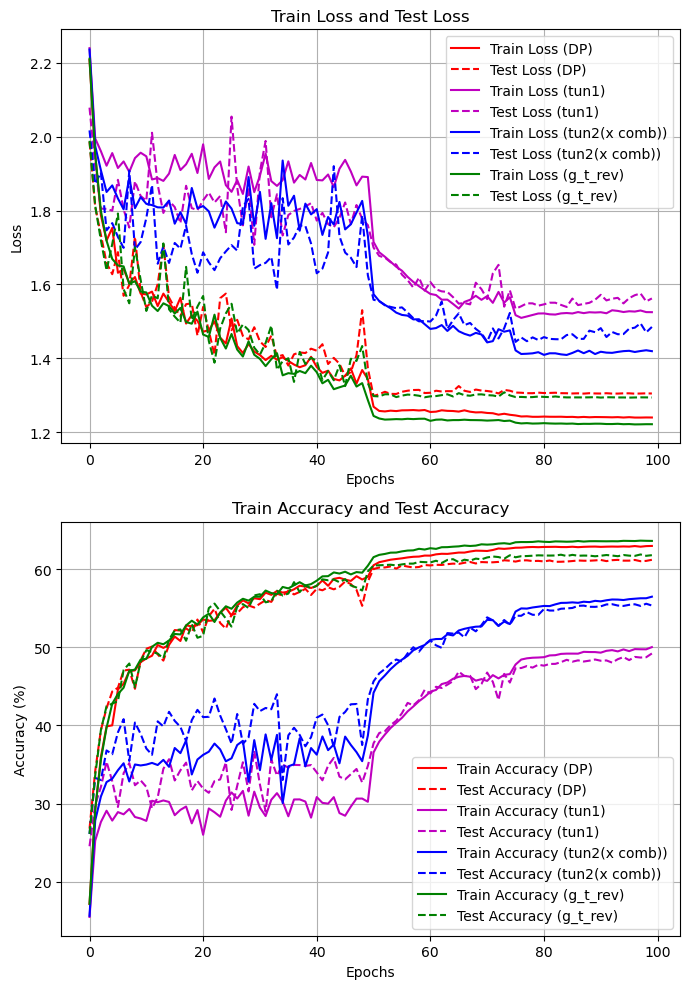

In [19]:
# 그래프 그리기
plt.figure(figsize=(7, 10))

# (1) Train Loss vs Test Loss
plt.subplot(2, 1, 1)
for idx, file in enumerate(log_files):
    epochs, train_loss, _, test_loss, _ = extract_log_data(file)
    # print("epochs", epochs)
    # print("train_loss", train_loss)
    plt.plot(epochs, train_loss, label=f"Train Loss ({labels[idx]})", color=colors[idx])
    plt.plot(
        epochs,
        test_loss,
        label=f"Test Loss ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train Loss and Test Loss")
plt.legend()
plt.grid(True)

# (2) Train Accuracy vs Test Accuracy
plt.subplot(2, 1, 2)
for idx, file in enumerate(log_files):
    epochs, _, train_acc, _, test_acc = extract_log_data(file)
    plt.plot(
        epochs, train_acc, label=f"Train Accuracy ({labels[idx]})", color=colors[idx]
    )
    plt.plot(
        epochs,
        test_acc,
        label=f"Test Accuracy ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train Accuracy and Test Accuracy")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

In [10]:
log_files = [
    "first_DP_log.txt",
    "second_DPKF_log_dt-rev.txt",
    "second_DPKF_log_gt-rev.txt",
    "second_DPKF_log_gt-rev2.txt",
]  # 파일 경로를 입력하세요.

In [11]:
# 각 파일의 라벨 (원하는 이름으로 수정)
labels = ["DP", "d_t_rev", "g_t_rev", "g_t_rev2"]

In [12]:
# 사용할 색상 (각 파일마다 다르게 설정)
colors = ["r", "m", "b", "g", "c", "y", "k"]

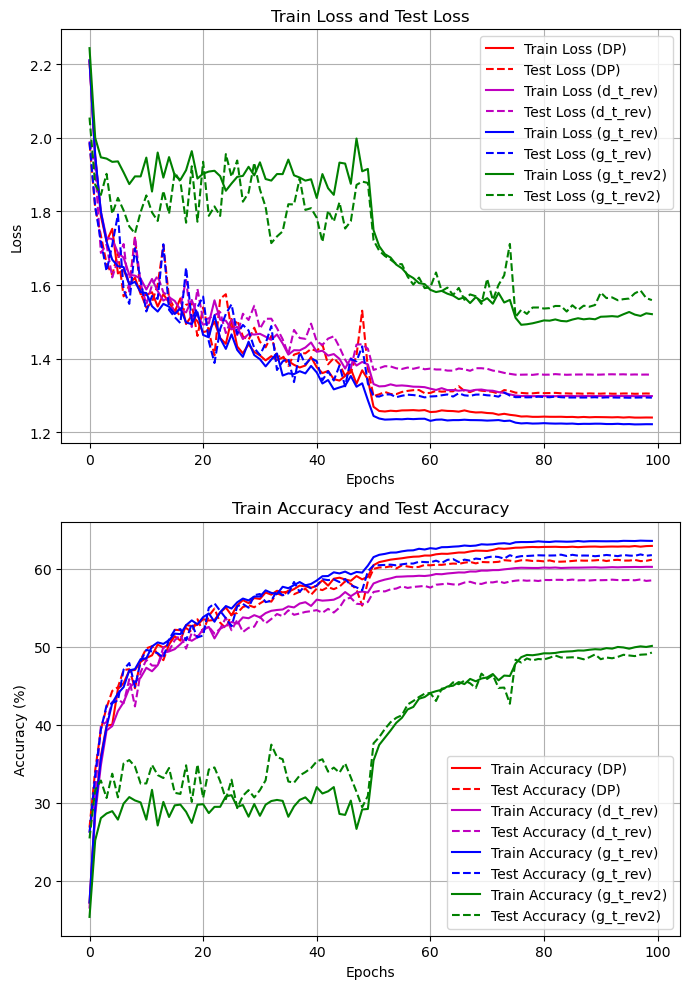

In [13]:
# 그래프 그리기
plt.figure(figsize=(7, 10))

# (1) Train Loss vs Test Loss
plt.subplot(2, 1, 1)
for idx, file in enumerate(log_files):
    epochs, train_loss, _, test_loss, _ = extract_log_data(file)
    # print("epochs", epochs)
    # print("train_loss", train_loss)
    plt.plot(epochs, train_loss, label=f"Train Loss ({labels[idx]})", color=colors[idx])
    plt.plot(
        epochs,
        test_loss,
        label=f"Test Loss ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train Loss and Test Loss")
plt.legend()
plt.grid(True)

# (2) Train Accuracy vs Test Accuracy
plt.subplot(2, 1, 2)
for idx, file in enumerate(log_files):
    epochs, _, train_acc, _, test_acc = extract_log_data(file)
    plt.plot(
        epochs, train_acc, label=f"Train Accuracy ({labels[idx]})", color=colors[idx]
    )
    plt.plot(
        epochs,
        test_acc,
        label=f"Test Accuracy ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train Accuracy and Test Accuracy")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

In [2]:
import re
import matplotlib.pyplot as plt

In [3]:
log_files = [
    "first_noDP_log.txt",
    "first_DP_log.txt",
    "firtst_DPKF_log.txt",
]  # 파일 경로를 입력하세요.

In [4]:
# 각 파일의 라벨 (원하는 이름으로 수정)
labels = ["Basic", "DP", "DP w/ draft KF"]

In [22]:
# 사용할 색상 (각 파일마다 다르게 설정)
colors = ["m", "r", "b", "g", "c", "y", "k"]

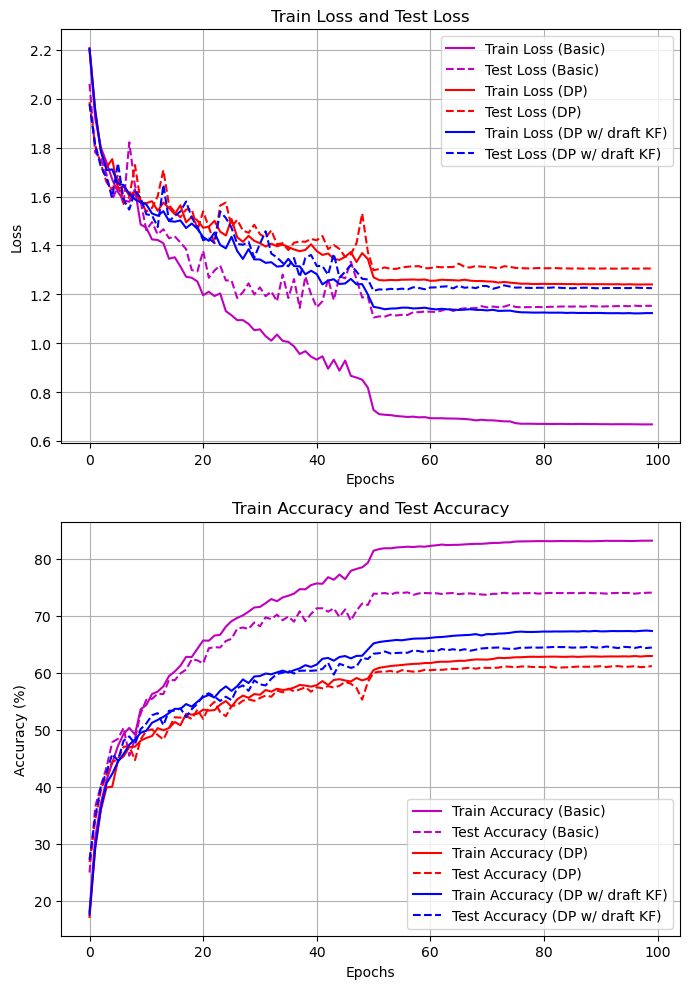

In [23]:
# 그래프 그리기
plt.figure(figsize=(7, 10))

# (1) Train Loss vs Test Loss
plt.subplot(2, 1, 1)
for idx, file in enumerate(log_files):
    epochs, train_loss, _, test_loss, _ = extract_log_data(file)
    #print("epochs", epochs)
    #print("train_loss", train_loss)
    plt.plot(epochs, train_loss, label=f"Train Loss ({labels[idx]})", color=colors[idx])
    plt.plot(
        epochs,
        test_loss,
        label=f"Test Loss ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train Loss and Test Loss")
plt.legend()
plt.grid(True)

# (2) Train Accuracy vs Test Accuracy
plt.subplot(2, 1, 2)
for idx, file in enumerate(log_files):
    epochs, _, train_acc, _, test_acc = extract_log_data(file)
    plt.plot(
        epochs, train_acc, label=f"Train Accuracy ({labels[idx]})", color=colors[idx]
    )
    plt.plot(
        epochs,
        test_acc,
        label=f"Test Accuracy ({labels[idx]})",
        linestyle="--",
        color=colors[idx],
    )
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train Accuracy and Test Accuracy")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()